# Marketing Lead Categorization by Thiyaneshwaran Nagarajan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('sales.csv')
data.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [3]:
data = data.drop('Unnamed: 0',axis=1)

In [4]:
data.head(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
5,14-11-2018 07:33,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
6,14-11-2018 05:58,NaN,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
7,14-11-2018 05:49,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
8,14-11-2018 05:40,NaN,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,NaN,Mode-5,Open
9,14-11-2018 05:06,NaN,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


In [6]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [7]:
data.Product_ID.unique()

array([nan,  9., 19., 18., 15., 27.,  5.,  2.,  3., 25., 10., 20., 11.,
       21.,  1., 12., 13., 17., 24., 26., 16., 23., 22.,  8., 14.,  6.,
        0., 28.,  7.,  4.])

In [8]:
imp_features= ['Product_ID','Source','Sales_Agent','Location','Delivery_Mode','Status']

In [9]:
for features in imp_features:
    print(f"Unique Values in \"{features}\" column are:", data[features].unique())
    print("Number of unique values are:", len(data[features].unique()))
    print("\n")

Unique Values in "Product_ID" column are: [nan  9. 19. 18. 15. 27.  5.  2.  3. 25. 10. 20. 11. 21.  1. 12. 13. 17.
 24. 26. 16. 23. 22.  8. 14.  6.  0. 28.  7.  4.]
Number of unique values are: 30


Unique Values in "Source" column are: ['Website' nan 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']
Number of unique values are: 26


Unique Values in "Sales_Agent" column are: ['Sales-Agent-11' 'Sales-Agent-10' 'Sales-Agent-3' 'Sales-Agent-4'
 'Sales-Agent-9' 'Sales-Agent-7' nan 'Sales-Agent-8' 'Sales-Agent-5'
 'Sales-Agent-2' 'Sales-Agent-12' 'Sales-Agent-1' 'Sales-Agent-6']
Number of unique values are: 13


Unique V

## Exploratory Data Analysis

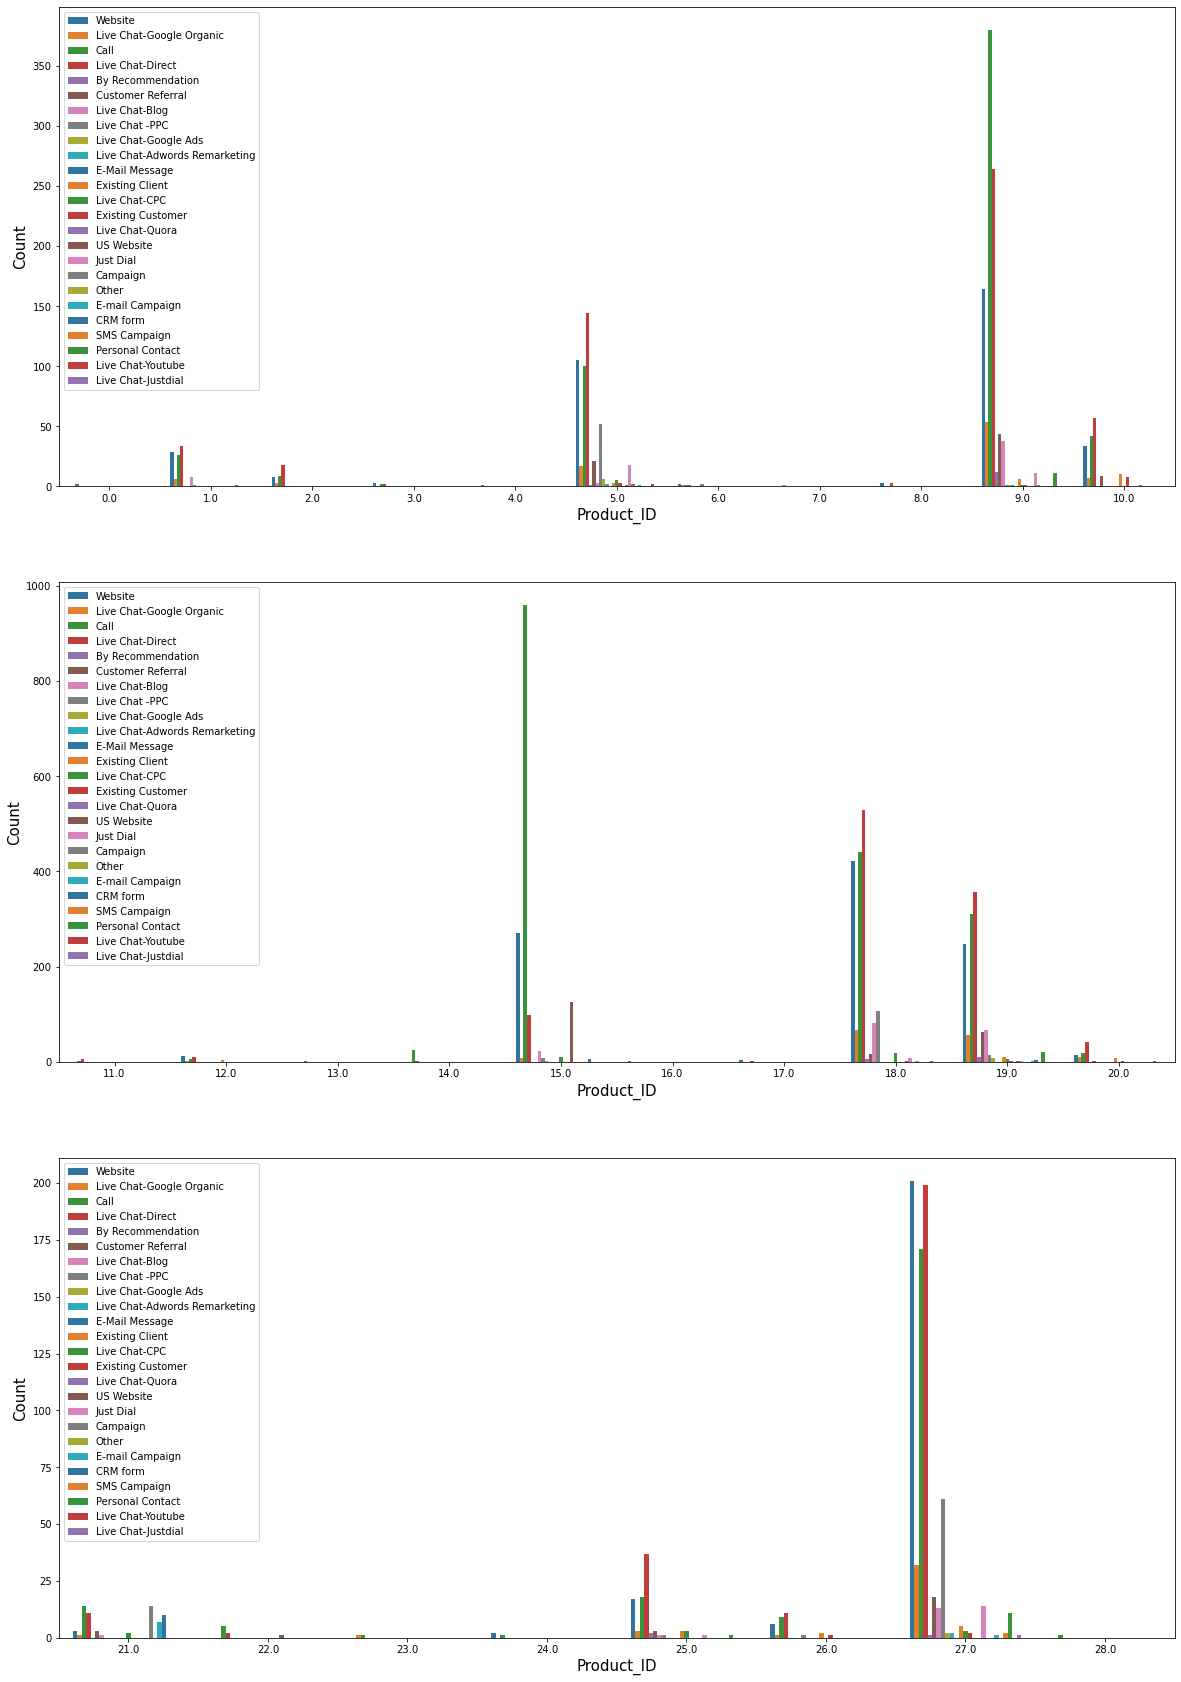

In [10]:
fig,ax = plt.subplots(3,1,figsize=(20,30))
sns.countplot(data=data,x=data.Product_ID[data.Product_ID<=10],hue="Source",palette=sns.color_palette(),ax=ax[0],)
ax[0].set_xlabel("Product_ID",fontsize=15)
ax[0].set_ylabel("Count",fontsize=15)
ax[0].legend(loc='upper left')
sns.countplot(data=data,x=data.Product_ID[(data.Product_ID>10) & (data.Product_ID<=20)], hue='Source',palette=sns.color_palette(),ax=ax[1])
ax[1].set_xlabel("Product_ID",fontsize=15)
ax[1].set_ylabel("Count",fontsize=15)
ax[1].legend(loc='upper left')
sns.countplot(data=data,x=data.Product_ID[data.Product_ID>20], hue='Source',palette=sns.color_palette(),ax=ax[2])
ax[2].set_xlabel("Product_ID",fontsize=15)
ax[2].set_ylabel("Count",fontsize=15)
ax[2].legend(loc='upper left')

In [11]:
def plot_feature(feature,hue):
    sns.countplot(data=data,x=data[feature][data[feature]<=10], hue=hue,palette=sns.color_palette(),ax=ax[0])
    ax[0].set_xlabel("Product_ID",fontsize=15)
    ax[0].set_ylabel("Count",fontsize=15)
    ax[0].legend(loc='upper left')
    sns.countplot(data=data,x=data[feature][(data[feature]>10) & (data[feature]<=20)], hue=hue,palette=sns.color_palette(),ax=ax[1])
    ax[1].set_xlabel("Product_ID",fontsize=15)
    ax[1].set_ylabel("Count",fontsize=15)
    ax[1].legend(loc='upper left')
    sns.countplot(data=data,x=data[feature][data[feature]>20], hue=hue,palette=sns.color_palette(),ax=ax[2])
    ax[2].set_xlabel("Product_ID",fontsize=15)
    ax[2].set_ylabel("Count",fontsize=15)
    ax[2].legend(loc='upper left')

### Product_ID vs Source

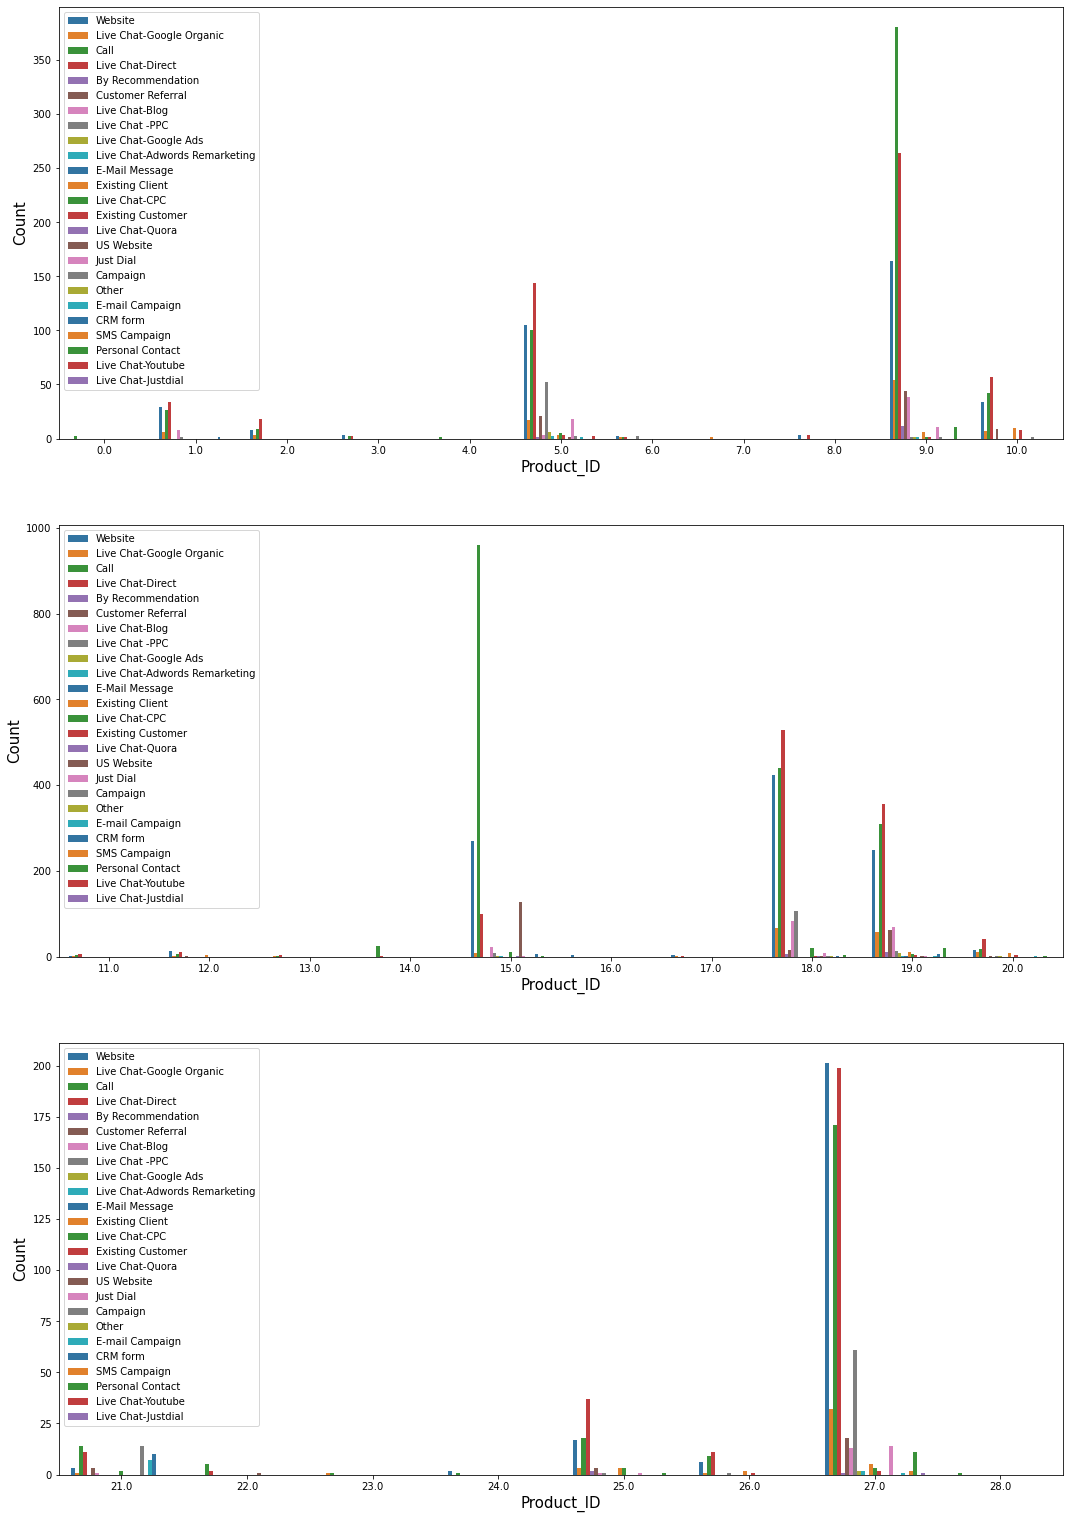

In [12]:
fig,ax = plt.subplots(3,1,figsize=(18,27))
plot_feature("Product_ID",'Source')

#### The products with Product_ID 5, 9, 15, 18, 19, 27 has the higher counts of sources.

##### For Product_ID: 5, the sources are high from "website, call and Live-chat Direct".
##### For Product_ID: 9, the high amount of sources are from "website, call and Live-chat Direct" in which "call" is highest.
##### For Product_ID: 15, the high amount of sources are from "website and call" in which "call" is highest.
##### For Product_ID: 18, the high amount of sources are from "website, call and Live-chat Direct" in which "Live-chat Direct" is highest.
##### For Product_ID: 19, the high amount of sources are from "website, call and Live-chat Direct" in which "Live-chat Direct" is highest.
##### For Product_ID: 27, the high amount of sources are from "website, call and Live-chat Direct" in which "website" is highest.}

### Product_ID vs Sales_Agent

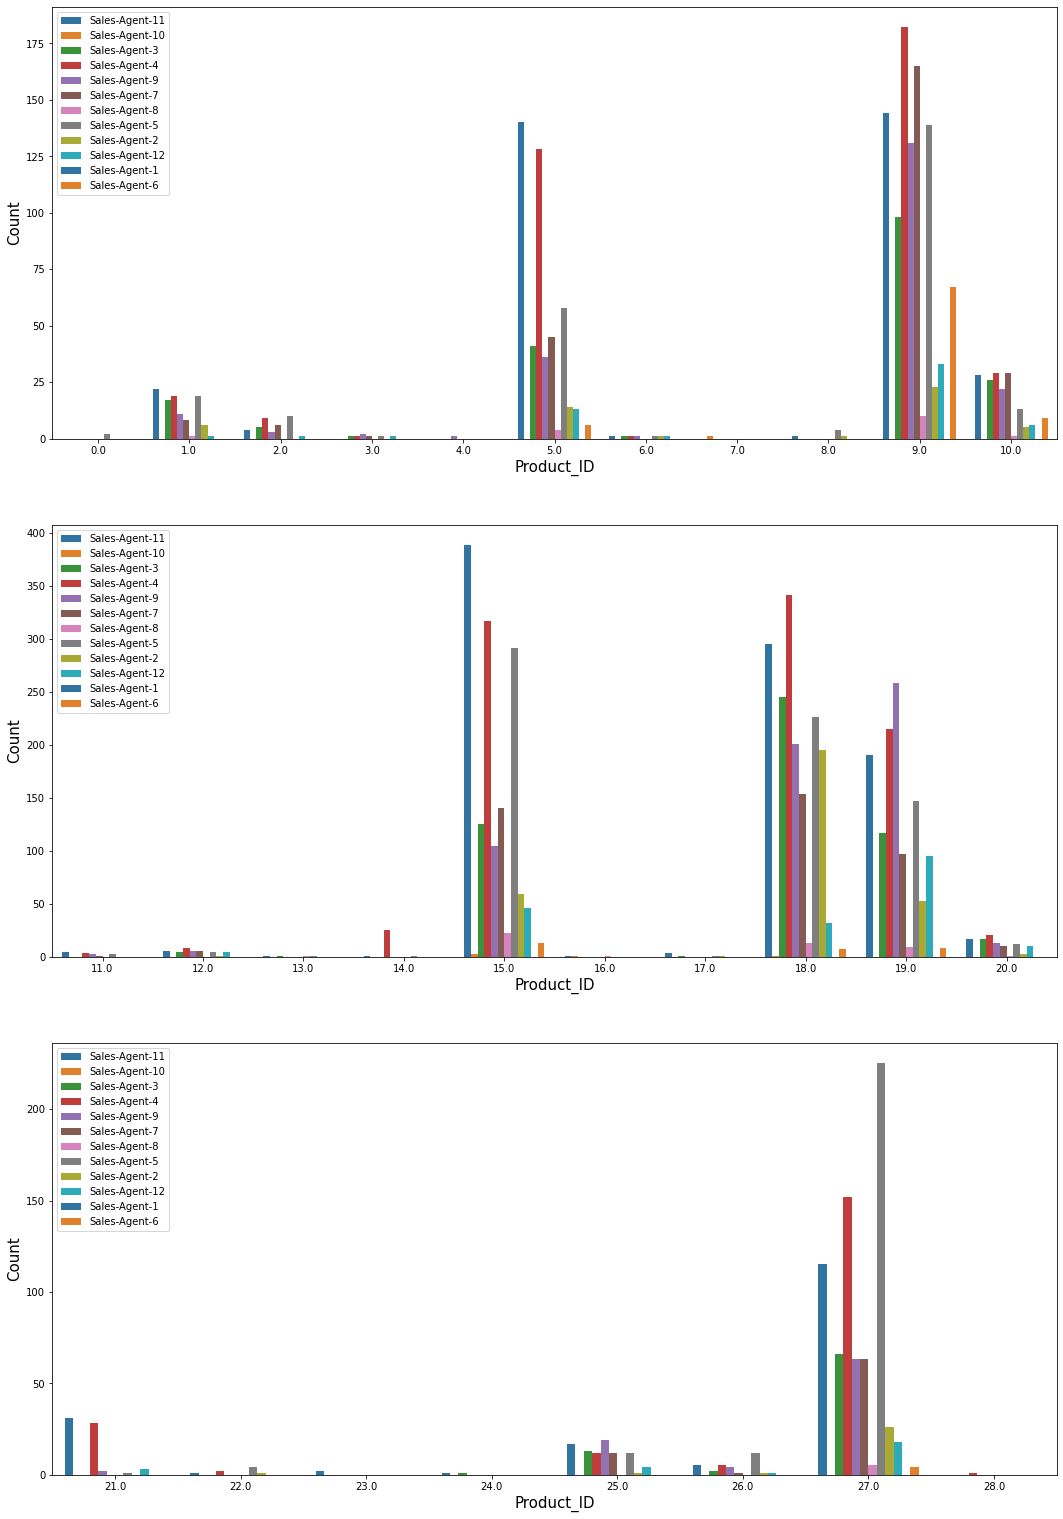

In [13]:
fig,ax = plt.subplots(3,1,figsize=(18,27))
plot_feature("Product_ID",'Sales_Agent')

##### The Product_ID: 5 are mostly handled by sales agents 11 and 4.
##### The Product_ID: 9 are mostly handled by sales agents 11,3,4,9,7 and 5.
##### The Product_ID: 15 are mostly handled by sales agents 11,3,4,9,7 and 5.
##### The Product_ID: 18 are mostly handled by sales agents 11,3,4,9,7,5 and 2.
##### The Product_ID: 19 are mostly handled by sales agents 11,3,4,9,7,5 and 12.
##### The Product_ID: 27 are mostly handled by sales agents 11,4 and 5

### Product_ID vs Location

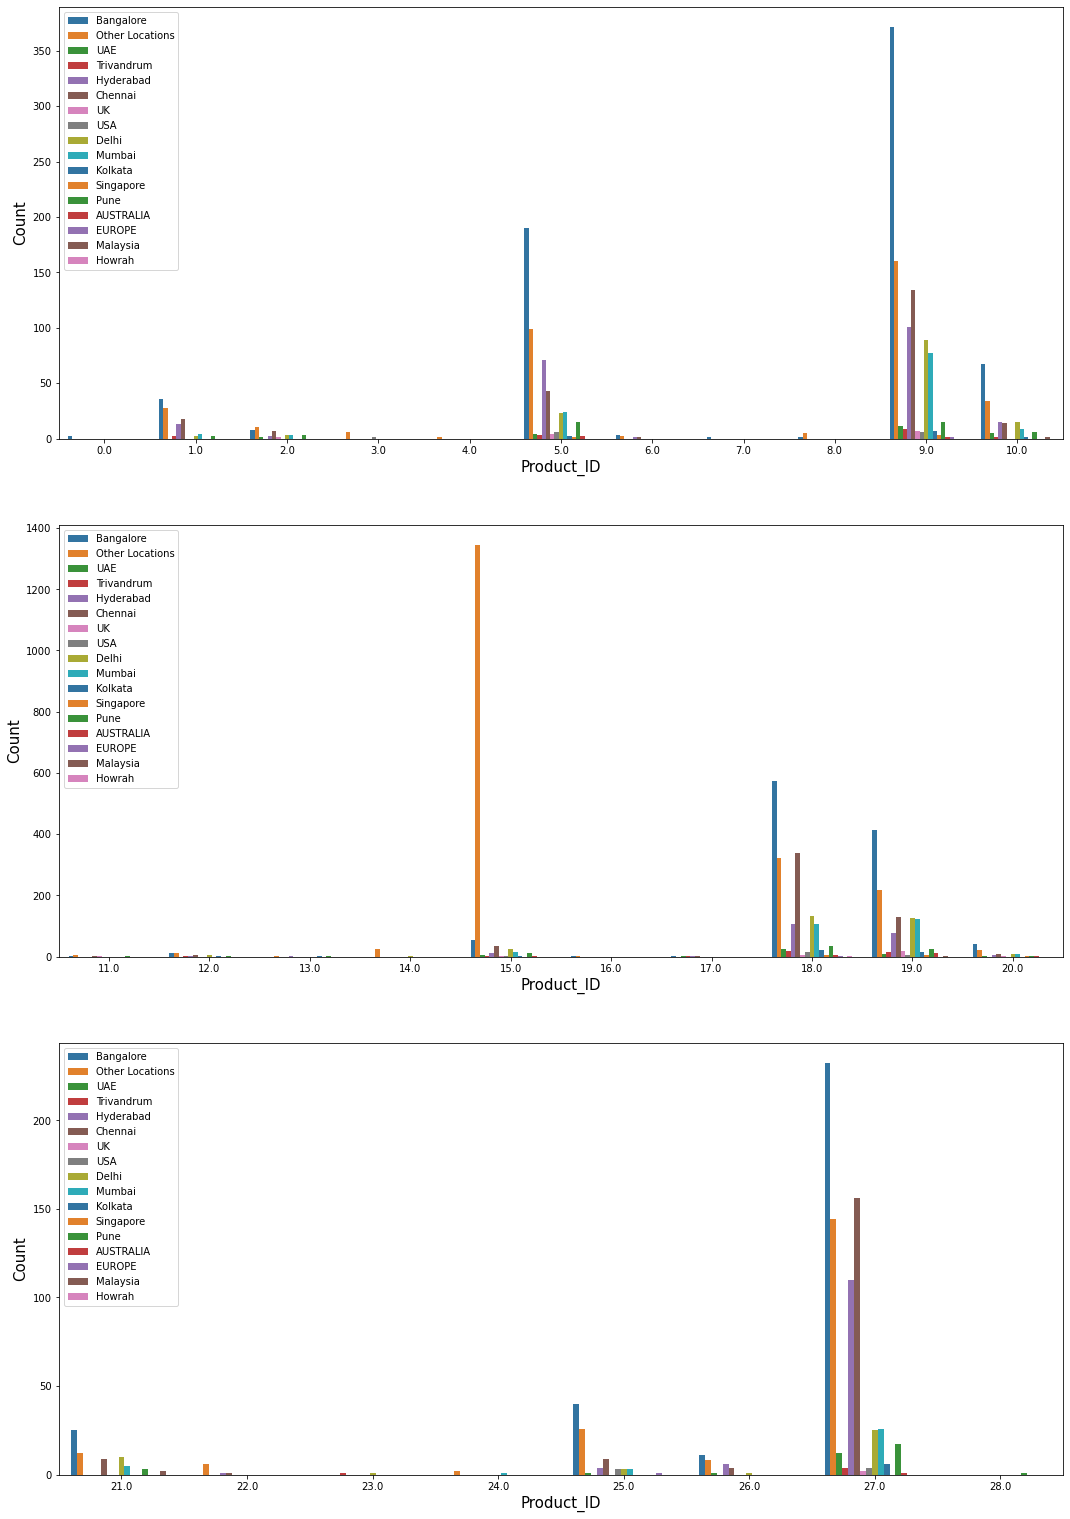

In [14]:
fig,ax = plt.subplots(3,1,figsize=(18,27))
plot_feature("Product_ID",'Location')

##### For Prduct ID: 5, the leads are higher from "Bangalore and Other Locations".
##### For Prduct ID: 9, the leads are higher from "Bangalore, Chennai, Hyderabad and Other Locations".
##### For Prduct ID: 15, the leads are higher from "Other Locations".
##### For Prduct ID: 18, the leads are higher from "Bangalore, UK, Chennai, Delhi, Mumbai and Other Locations".
##### For Prduct ID: 19, the leads are higher from "Bangalore, Chennai, Delhi, Mumbai and Other Locations".
##### For Prduct ID: 27, the leads are higher from "Bangalore, UK, Chennai and Other Locations".

### Product_ID vs Delivery_Mode

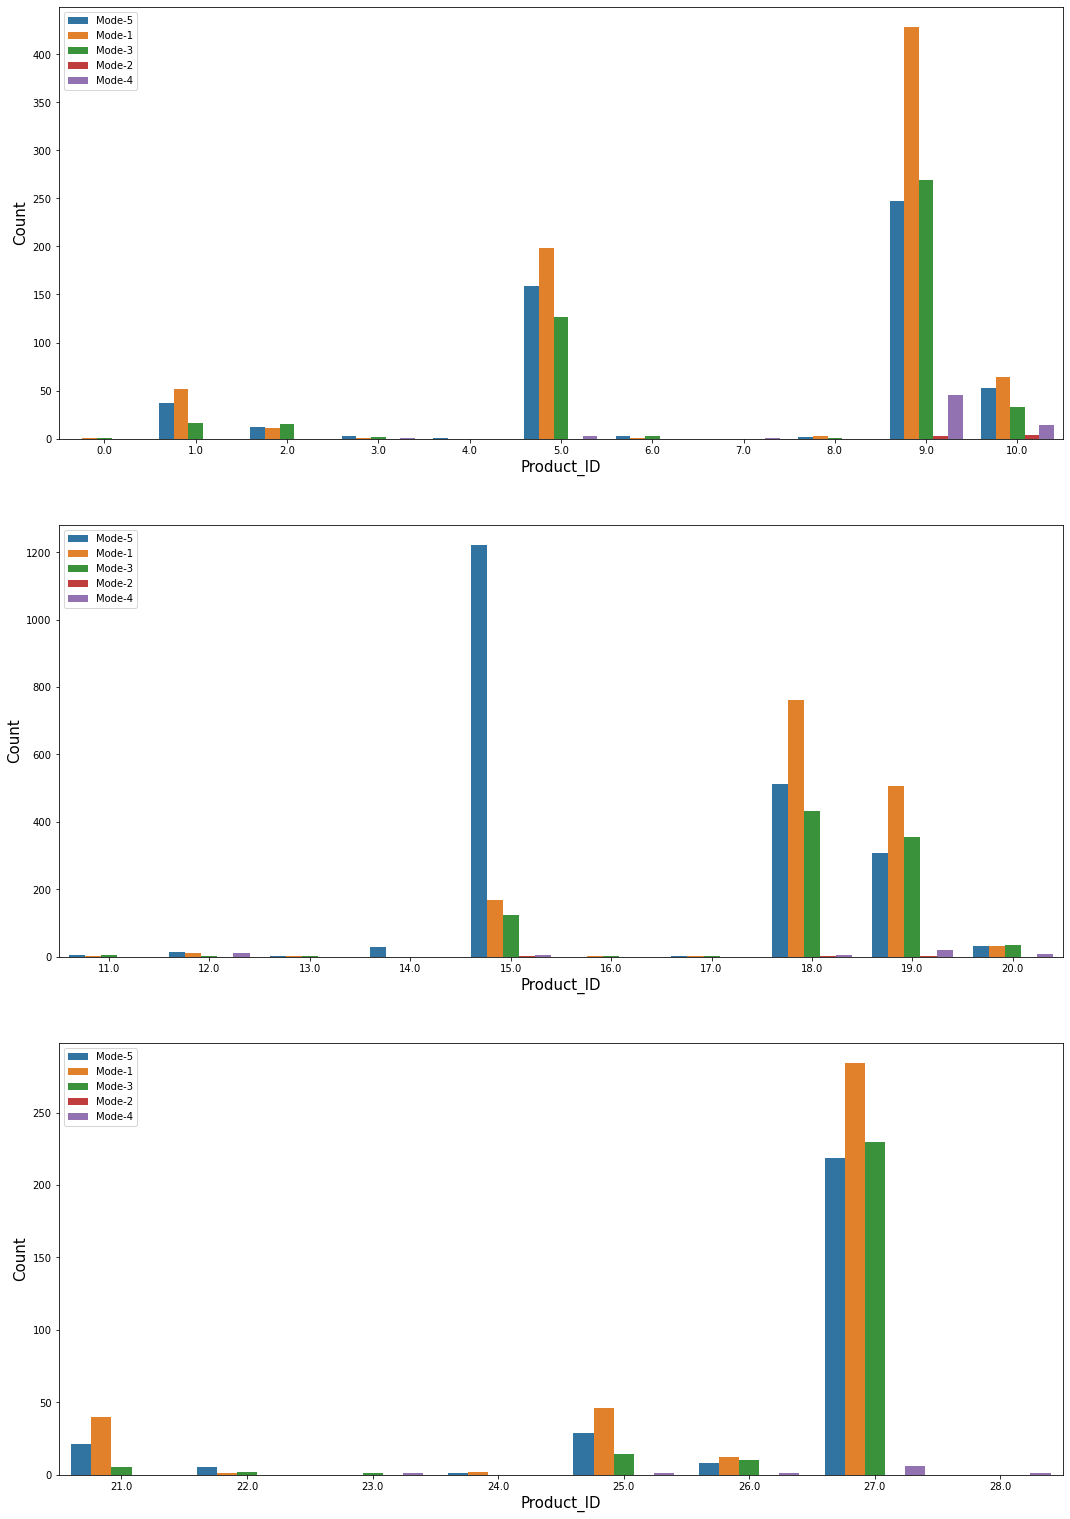

In [15]:
fig,ax = plt.subplots(3,1,figsize=(18,27))
plot_feature("Product_ID",'Delivery_Mode')

##### For Product_ID: 5, the preferred deivery modes are 5, 1 and 3.
##### For Product_ID: 9, the preferred deivery modes are 5, 1 and 3.
##### For Product_ID: 15, the preferred deivery modes are 5, 1 and 3.
##### For Product_ID: 18, the preferred deivery modes are 5, 1 and 3.
##### For Product_ID: 19, the preferred deivery modes are 5, 1 and 3.
##### For Product_ID: 27, the preferred deivery modes are 5, 1 and 3.

### Product_ID vs Status

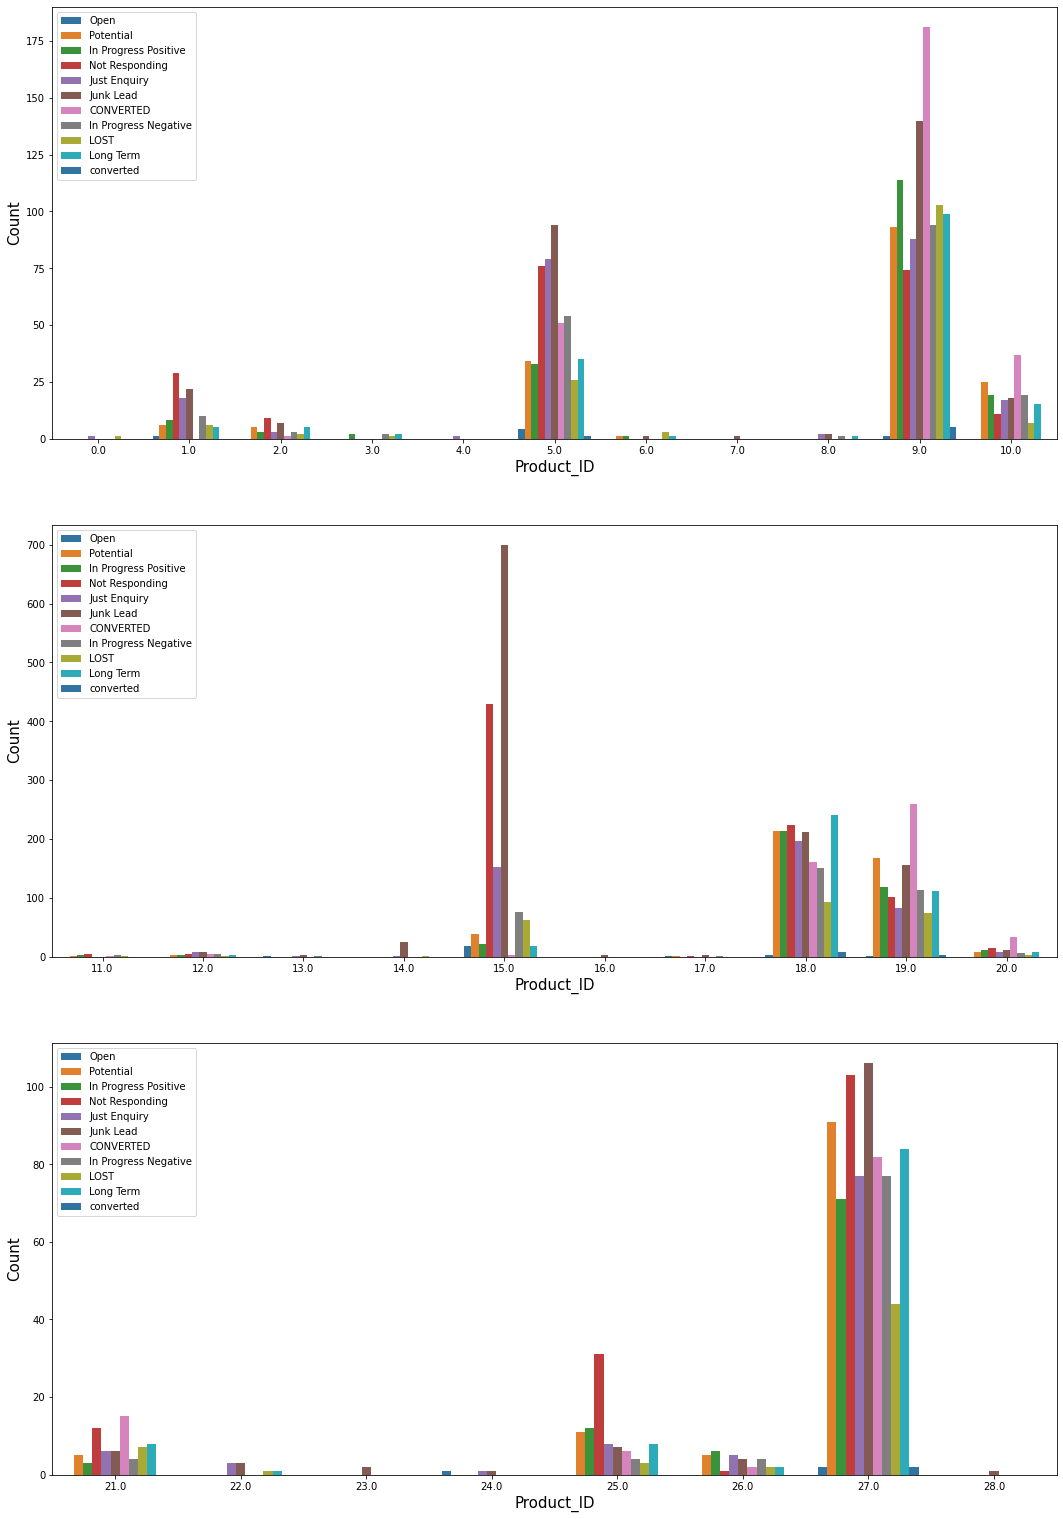

In [16]:
fig,ax = plt.subplots(3,1,figsize=(18,27))
plot_feature("Product_ID",'Status')

### Now only predominant Products (based on counts), Sales agent responsible and Status are chosen

#### Predominant Products: 5, 9 15, 18, 19, 27
##### The Product_ID: 5 are mostly handled by sales agents 11 and 4.
##### The Product_ID: 9 are mostly handled by sales agents 11,3,4,9,7 and 5.
##### The Product_ID: 15 are mostly handled by sales agents 11,3,4,9,7 and 5.
##### The Product_ID: 18 are mostly handled by sales agents 11,3,4,9,7,5 and 2.
##### The Product_ID: 19 are mostly handled by sales agents 11,3,4,9,7,5 and 12.
##### The Product_ID: 27 are mostly handled by sales agents 11,4 and 5

In [17]:
def sales(sales_agent, product_id,):
    idx_a=0
    idx_b=0
    for i in product_id:
        if product_id.index(i)<len(product_id)/2:
            x=data.Product_ID[(data.Product_ID==i)&(data.Sales_Agent==f'Sales-Agent-{sales_agent}')]
            y= data.Sales_Agent[(data.Product_ID==i)&(data.Sales_Agent==f'Sales-Agent-{sales_agent}')]
            sns.countplot(x=x, hue='Status',data=data,ax=ax[0,idx_a],palette=sns.color_palette())
            ax[0,idx_a].set_xlabel(f"Sales Agent:{sales_agent} handling Product_ID:{i}",fontsize=15)
            ax[0,idx_a].set_ylabel("Counts",fontsize=15)
            ax[0,idx_a].tick_params(axis='x', which='major', labelsize=15)
            ax[0,idx_a].tick_params(axis='y', which='major', labelsize=15)
            if idx_a < 2:
                ax[0,idx_a].legend([],[], frameon=False)
            else:
                ax[0,idx_a].legend(bbox_to_anchor=(1.05, 1))
            idx_a+=1
            
            
        else:
            x=data.Product_ID[(data.Product_ID==i)&(data.Sales_Agent==f'Sales-Agent-{sales_agent}')]
            y= data.Sales_Agent[(data.Product_ID==i)&(data.Sales_Agent==f'Sales-Agent-{sales_agent}')]
            sns.countplot(x=x, hue='Status',data=data,ax=ax[1,idx_b],palette=sns.color_palette())
            ax[1,idx_b].set_xlabel(f"Sales Agent:{sales_agent} handling Product_ID:{i}",fontsize=15)
            ax[1,idx_b].set_ylabel("Counts",fontsize=15)
            ax[1,idx_b].tick_params(axis='x', which='major', labelsize=15)
            ax[1,idx_b].tick_params(axis='y', which='major', labelsize=15)
            if idx_b < 2:
                ax[1,idx_b].legend([],[], frameon=False)
            else:
                ax[1,idx_b].legend(bbox_to_anchor=(1.05, 1))
            idx_b+=1

### Performance of Sales Agent 11

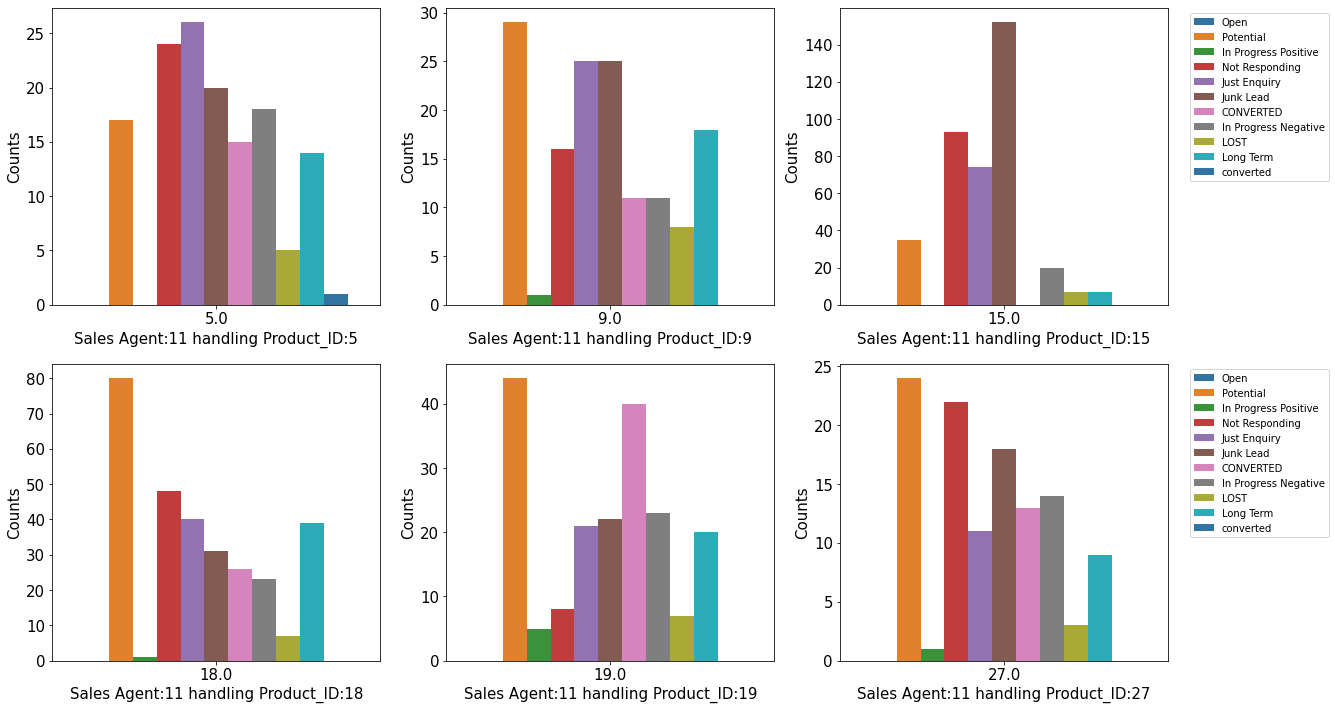

In [18]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(11, [5,9,15,18,19,27])

### Performance of Sales Agent 4

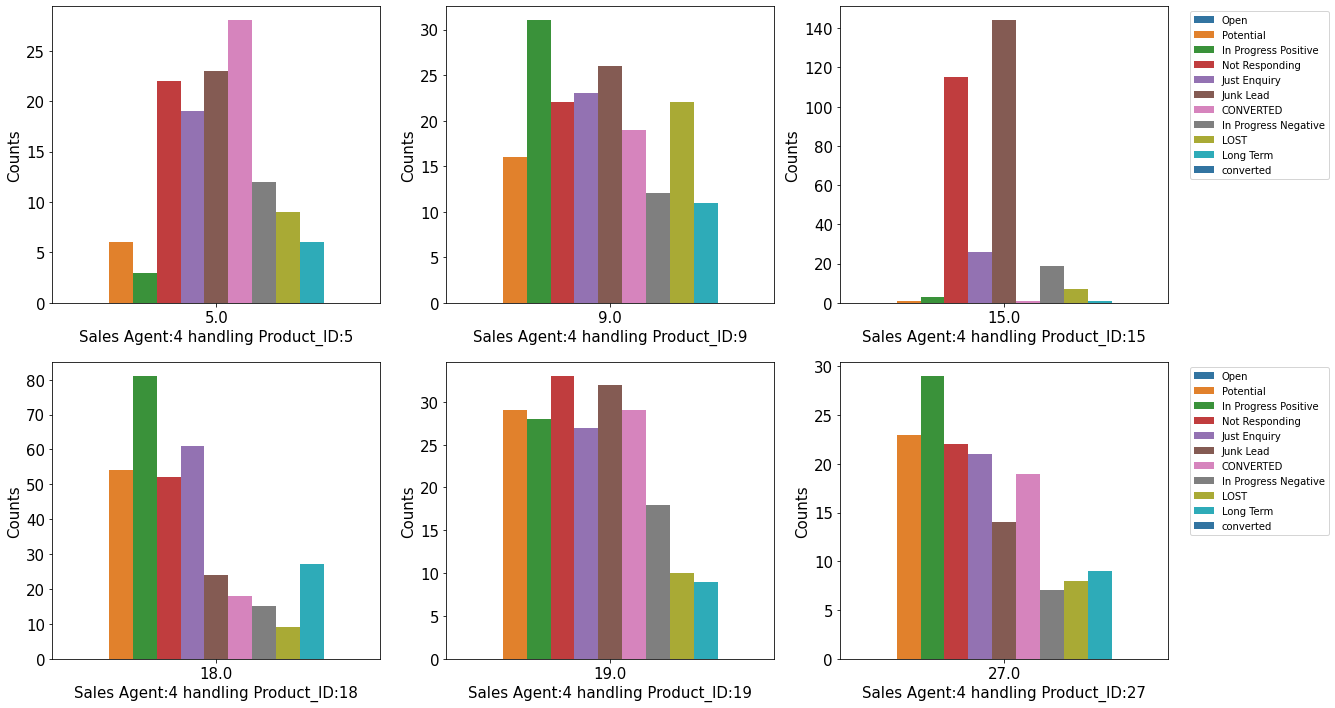

In [19]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(4, [5,9,15,18,19,27])

### Performance of Sales Agent 3

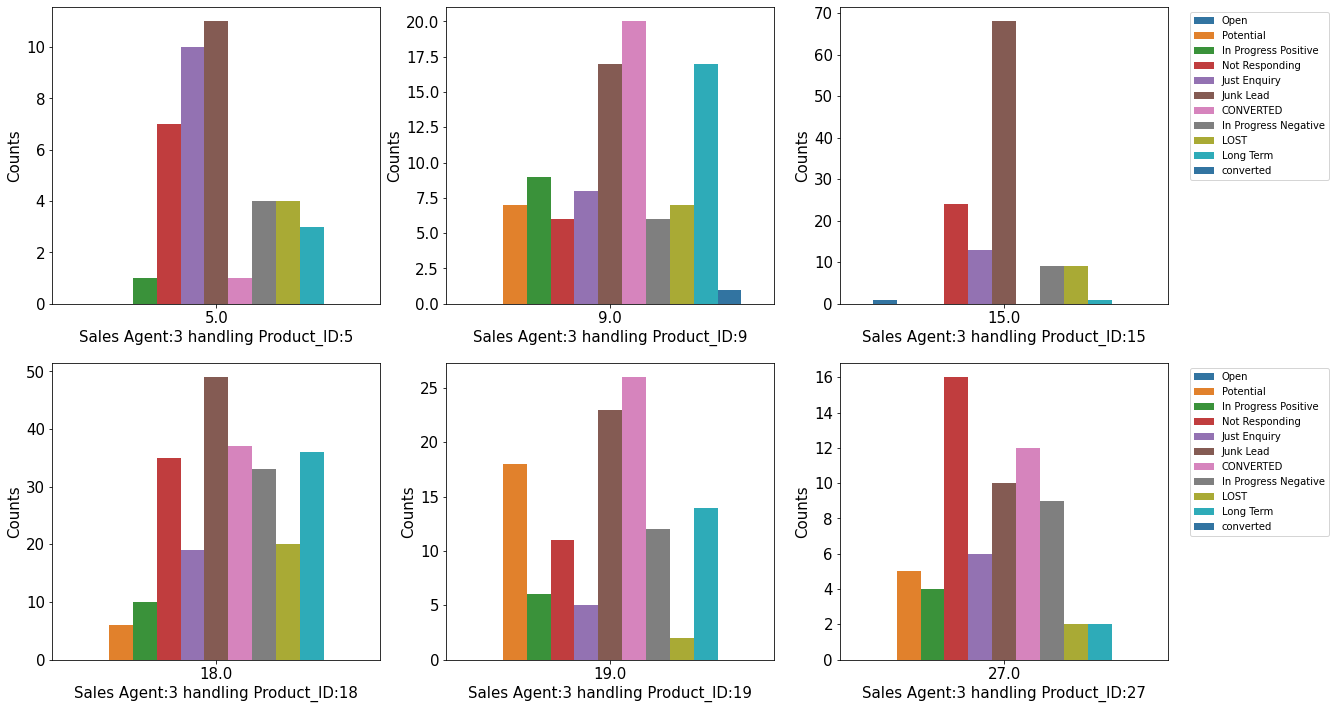

In [20]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(3, [5,9,15,18,19,27])

### Performance of Sales Agent 9

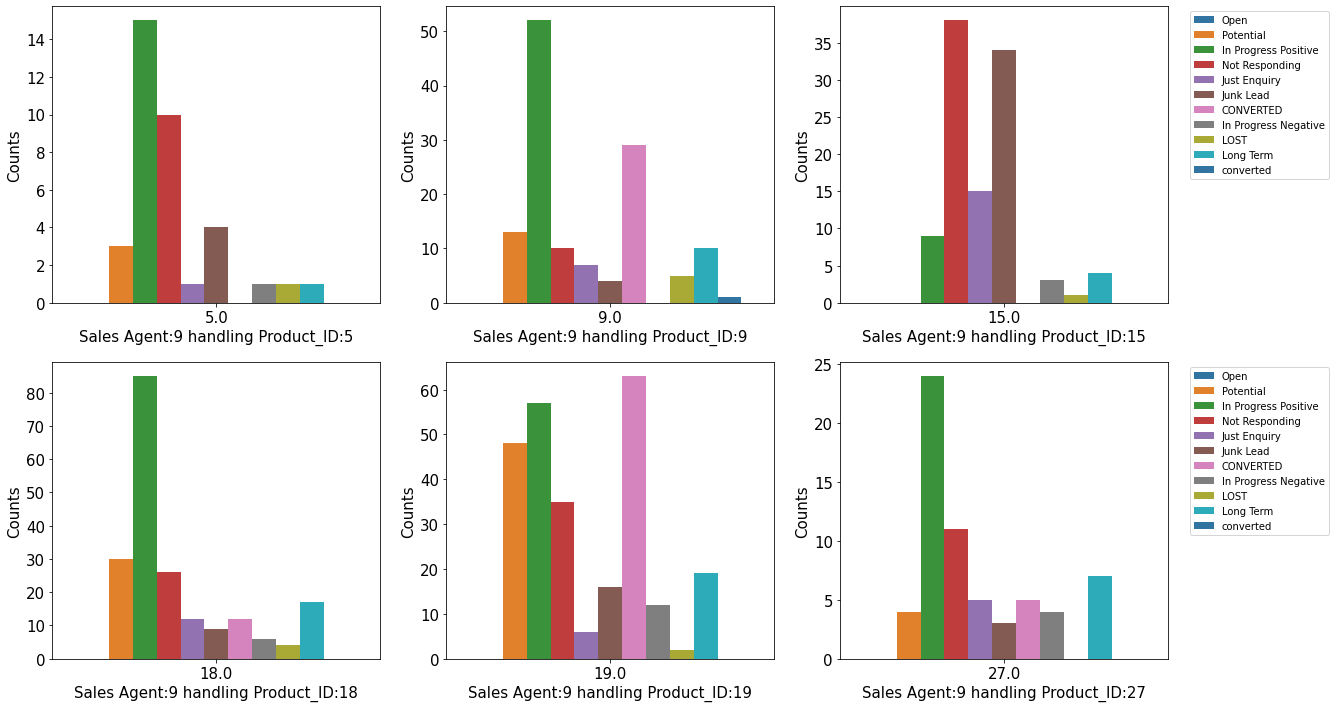

In [21]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(9, [5,9,15,18,19,27])

### Performance of Sales Agent 7

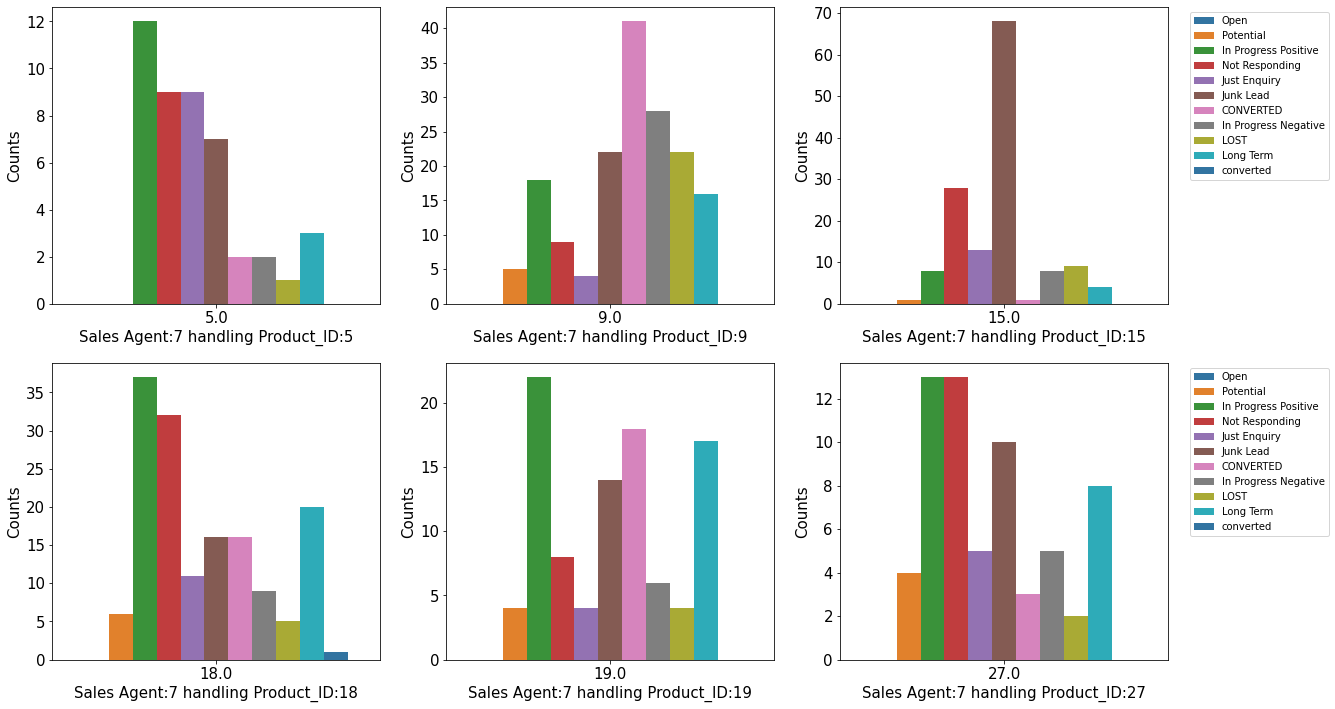

In [22]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(7, [5,9,15,18,19,27])

### Performance of Sales Agent 5

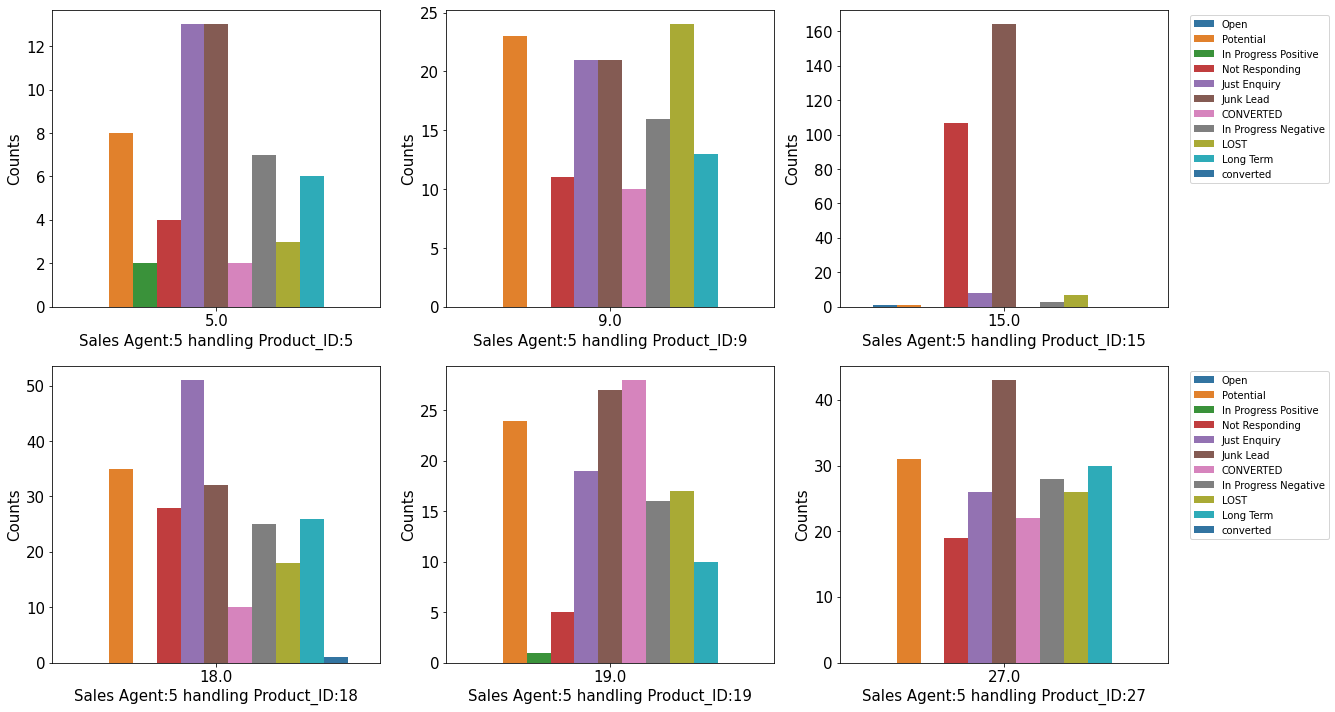

In [23]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(5, [5,9,15,18,19,27])

### Performance of Sales Agent 2

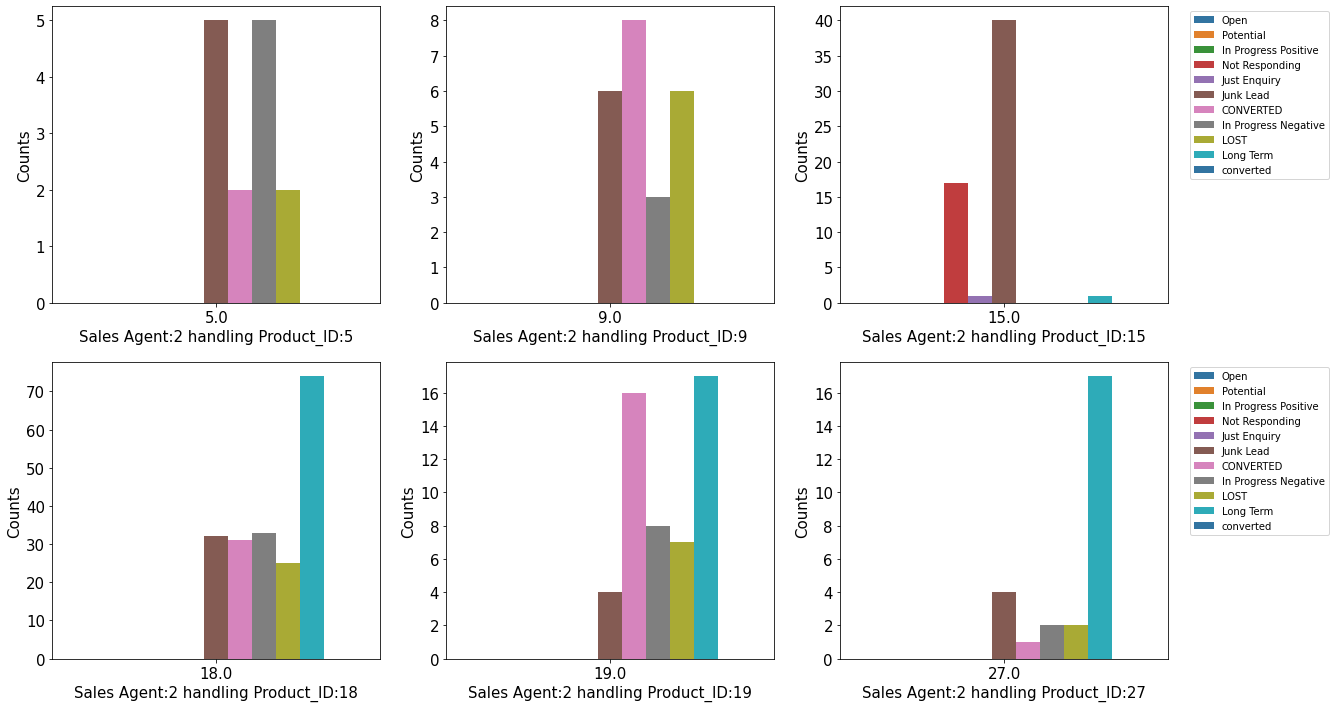

In [24]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(2, [5,9,15,18,19,27])

### Performance of Sales Agent 12

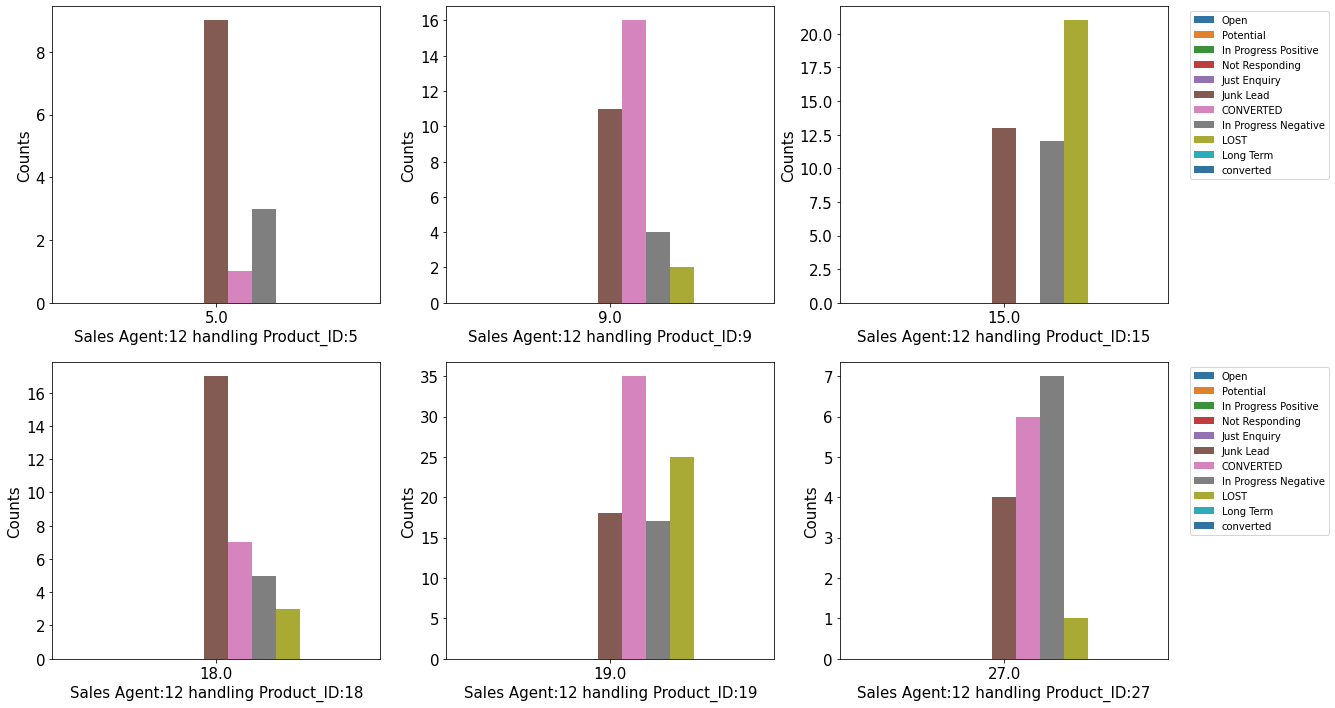

In [25]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
sales(12, [5,9,15,18,19,27])

### Delivery Mode vs Status

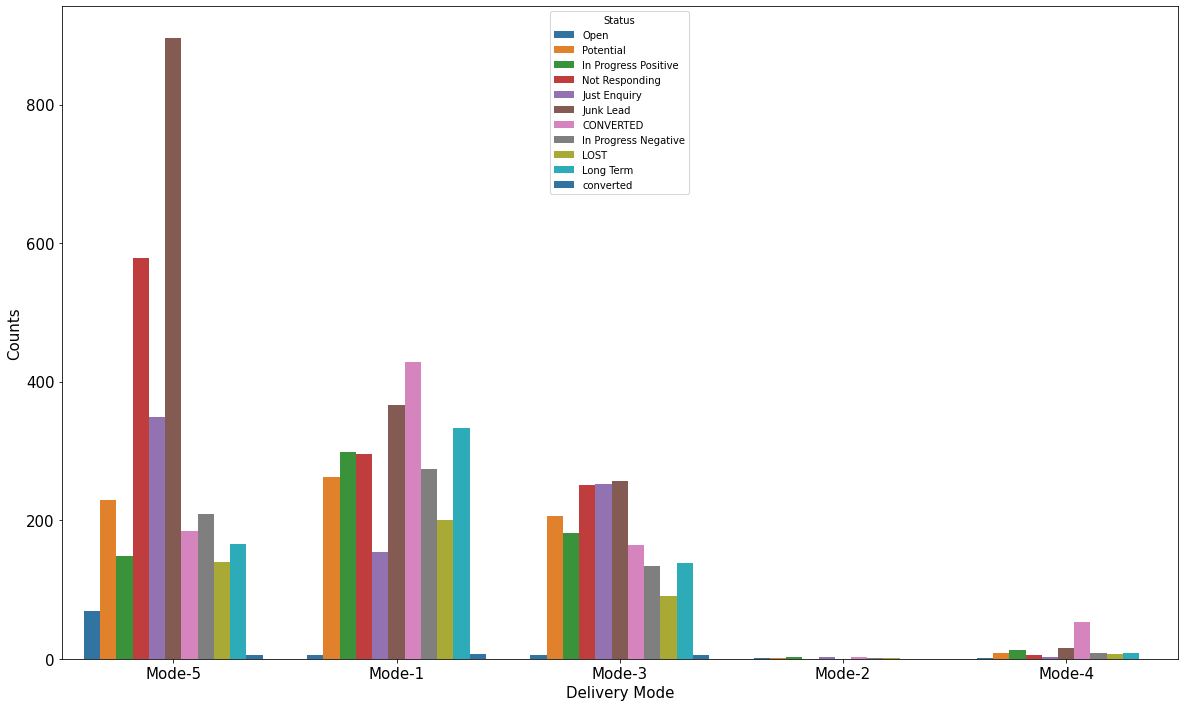

In [26]:
fig,ax = plt.subplots(figsize=(20,12))
x2=data.Delivery_Mode
sns.countplot(x=x2, hue='Status',data=data,ax=ax,palette=sns.color_palette())
ax.set_xlabel("Delivery Mode",fontsize=15)
ax.set_ylabel("Counts",fontsize=15)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

## Data Preprocessing

### Dropping unnecessary columns

In [27]:
col_to_drop = ['Created','Mobile','EMAIL']

In [28]:
data2 = data.copy(deep=True)
data2=data2.drop(col_to_drop,axis=1)

In [29]:
print(data2.shape)
data2.head()

(7422, 6)


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


### Checking for Null values in "data2" dataframe

In [30]:
data2.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

### Dropping rows with NaN values in "data2" dataframe and creating new "data3" dataframe

In [31]:
data3 = data2.copy(deep=True)
data3=data3.dropna(axis=0)
data3.reset_index(drop=True,inplace=True)
print(data3.shape)
data3.head()

(7328, 6)


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


### Again checking for Nan values in "data3" dataframe

In [32]:
data3.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

##### Now there are no NaN values in the "data3" dataframe

### Creating a new feature that tells the lead category (Low or High Potential)

In [33]:
Low_Potential = ['Open','Not Responding','Just Enquiry','Junk Lead','In Progress Negative','LOST']
High_Potential = ['Potential','In Progress Positive','CONVERTED', 'Long Term','converted']
def status_to_cat(status):
    if status in Low_Potential:
        return "Low_Potential"
    else:
        return "High_Potential"

In [34]:
status_map={'Open':'Low_Potential','Potential':'High_Potential','In Progress Positive':'High_Potential',
            'Not Responding':'Low_Potential','Just Enquiry':'Low_Potential','Junk Lead':'Low_Potential',
            'CONVERTED':'High_Potential','In Progress Negative':'Low_Potential','LOST':'Low_Potential',
            'Long Term':'High_Potential','converted':'High_Potential'
            }

In [35]:
data3['Lead_category'] = data3.loc[:,"Status"].map(status_to_cat)

In [36]:
data3.Product_ID=data3.Product_ID.astype("int")
print(data3.shape)
data3.head()

(7328, 7)


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Lead_category
0,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential,High_Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,High_Potential
2,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,High_Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,Low_Potential
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,High_Potential


## Label Encoding

In [37]:
enc_features=['Source','Sales_Agent','Location','Delivery_Mode','Status','Lead_category'] # Features to encode

In [38]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for feature in enc_features:
    data3.loc[:,[feature]]=enc.fit_transform(data3[feature])

In [39]:
data3.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Lead_category
0,9,16,4,1,0,9,0
1,19,2,5,10,4,9,0
2,18,24,1,13,0,9,0
3,15,24,8,6,0,7,1
4,18,2,8,1,0,2,0


## Check for Balanced Data

In [40]:
from collections import Counter
Counter(data3.Lead_category)

Counter({0: 2843, 1: 4485})

### Over-Sampling the target class to balance minority

In [41]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()

In [42]:
X_balance1 = data3.iloc[:,0:6]
y_balance1 = data3.Lead_category
y_balance1

0       0
1       0
2       0
3       1
4       0
       ..
7323    1
7324    1
7325    1
7326    1
7327    0
Name: Lead_category, Length: 7328, dtype: int32

In [43]:
data_SMOTE1, y_balance1_new= oversampler.fit_resample(X_balance1,y_balance1)

In [44]:
data_SMOTE1['Lead_category']=y_balance1_new
print(data_SMOTE1.shape)
data_SMOTE1.head()

(8970, 7)


,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Lead_category
0,9,16,4,1,0,9,0
1,19,2,5,10,4,9,0
2,18,24,1,13,0,9,0
3,15,24,8,6,0,7,1
4,18,2,8,1,0,2,0


### Again checking for balanced data in target class

In [45]:
Counter(data_SMOTE1.Lead_category)

Counter({0: 4485, 1: 4485})

##### Now the target classes are balanced

## Features Selection

In [46]:
X = data_SMOTE1.iloc[ :,0:6]
y = data_SMOTE1.Lead_category

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,random_state=10)
print(X_train.shape)
y_train.shape

(6727, 6)


(6727,)

## Modelling the Problem with ML algorithm

### Defining the various classification ML models

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
model_logit = LogisticRegression()
model_KNN = KNeighborsClassifier(n_neighbors= 5)
model_SVC = SVC(random_state=7)
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_XGB = XGBClassifier(eval_metric='mlogloss')

In [49]:
import warnings
warnings.filterwarnings("ignore")

## Fitting the above-defined ML models

In [50]:
# Logistic Regression
model_logit.fit(X_train, y_train)
y_predict_logit = model_logit.predict(X_test)
# KNN
model_KNN.fit(X_train, y_train)
y_predict_KNN = model_KNN.predict(X_test)
# SVM
model_SVC.fit(X_train, y_train)
y_predict_SVC = model_SVC.predict(X_test)
# Decision Tree
model_tree.fit(X_train, y_train)
y_predict_tree = model_tree.predict(X_test)
# Random Forest
model_forest.fit(X_train, y_train)
y_predict_forest = model_forest.predict(X_test)
# XG Boost
model_XGB.fit(X_train, y_train)
y_predict_XGB = model_XGB.predict(X_test)

[0.6607222469906375, 0.847971466785555, 0.7877842175657601, 0.983058403923317, 0.9870708872046366, 0.9888542131074454]


Text(0, 0.5, 'Accuracy Score')

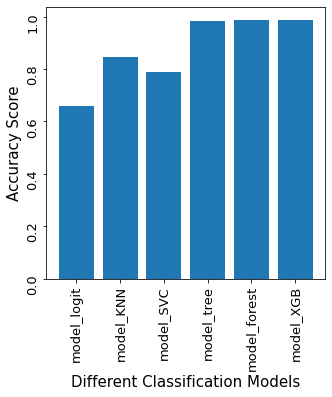

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_logit =accuracy_score(y_test,y_predict_logit)
accuracy_KNN =accuracy_score(y_test,y_predict_KNN)
accuracy_SVC=accuracy_score(y_test,y_predict_SVC)
accuracy_tree=accuracy_score(y_test,y_predict_tree)
accuracy_forest=accuracy_score(y_test,y_predict_forest)
accuracy_XGB=accuracy_score(y_test,y_predict_XGB)
models_names=["model_logit","model_KNN","model_SVC","model_tree","model_forest","model_XGB"]
score=[accuracy_logit,accuracy_KNN,accuracy_SVC,accuracy_tree,accuracy_forest,accuracy_XGB]
print(score)
fig,ax=plt.subplots(figsize=(5,5))
ax.bar(models_names,score)
ax.tick_params(axis='both',labelsize=13,rotation=90)
ax.set_xlabel('Different Classification Models',fontsize=15)
ax.set_ylabel('Accuracy Score',fontsize=15)

##### The Decision Tree, Random Forest and XG Boost models gives highest accuracy scores.

### Confusion Matrix

In [52]:
#Confusion Matrix for Decision Tree
confusion_tree = confusion_matrix(y_test,y_predict_tree)
confusion_tree

array([[1102,   21],
       [  17, 1103]], dtype=int64)

In [53]:
#Confusion Matrix for Random Forest
confusion_forest = confusion_matrix(y_test,y_predict_forest)
confusion_forest

array([[1096,   27],
       [   2, 1118]], dtype=int64)

In [54]:
#Confusion Matrix for XG Boost
confusion_XGB = confusion_matrix(y_test,y_predict_XGB)
confusion_XGB

array([[1101,   22],
       [   3, 1117]], dtype=int64)

### Classification Report of XGB Model

In [55]:
report_XGB = classification_report(y_test,y_predict_XGB)
print(report_XGB)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1123
           1       0.98      1.00      0.99      1120

    accuracy                           0.99      2243
   macro avg       0.99      0.99      0.99      2243
weighted avg       0.99      0.99      0.99      2243



##### The XG Boost Model gives highest accuracy score with less False Positive and False Negative

### ROC-AUC Curve for XG Boost Model

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [57]:
y_roc_predict = model_XGB.predict_proba(X_test)[::,1]
fpr,tpr,thresholds = roc_curve(y_test,y_roc_predict)

In [58]:
auc = roc_auc_score(y_test, y_roc_predict)
auc

0.9981391521434932

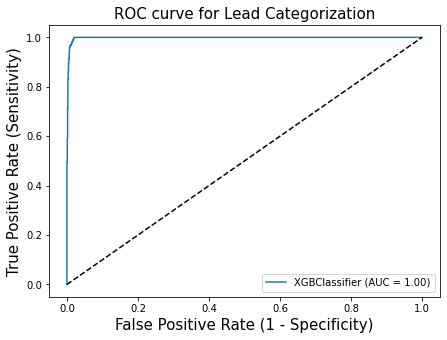

In [59]:
fig,ax=plt.subplots(figsize=(7,5))
plot_roc_curve(model_XGB, X_test, y_test,ax=ax)
ax.set_xlabel('False Positive Rate (1 - Specificity)',fontsize=15)
ax.set_ylabel('True Positive Rate (Sensitivity)',fontsize=15)
ax.set_title('ROC curve for Lead Categorization',fontdict={'fontsize':15})
ax.plot([0, 1], [0, 1], color='black', linestyle='--',label='ROC curve (area = %0.2f)' % auc)

##### The AUC for XG Boost model is 99.8

### K Fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
models = [model_logit,model_KNN,model_SVC,model_tree,model_forest,model_XGB]
def cross_val(models,X,y):
    global avg_cv_scores
    avg_cv_scores=[]
    cv_score_names=['cv_score_logit','cv_score_KNN','cv_score_SVC','cv_score_tree','cv_score_forest','cv_score_XGB']
    global cv_score_names2
    cv_score_names2=['cv_score_logit','cv_score_KNN','cv_score_SVC','cv_score_tree','cv_score_forest','cv_score_XGB']
    for i in np.arange(0,6):
        cv_score_names[i] = cross_val_score(models[i],X,y,cv=10,scoring='accuracy')
        avg_cv_scores.append(cv_score_names[i].mean())
        print(cv_score_names2[i],':',cv_score_names[i])
        print("Average Accuracy:",cv_score_names[i].mean())
        print("Std. Deviation:",cv_score_names[i].std())
        print('\n')

In [61]:
cross_val(models,X,y)

cv_score_logit : [0.71237458 0.65440357 0.65105909 0.67001115 0.68561873 0.69899666
 0.71125975 0.65105909 0.57413601 0.57190635]
Average Accuracy: 0.6580824972129321
Std. Deviation: 0.04789100951141001


cv_score_KNN : [0.83835006 0.80713489 0.82051282 0.82274247 0.82943144 0.82497213
 0.87848384 0.84615385 0.82497213 0.83277592]
Average Accuracy: 0.8325529542920848
Std. Deviation: 0.018276367118236943


cv_score_SVC : [0.83723523 0.76811594 0.76365663 0.787068   0.81270903 0.79821628
 0.80490524 0.77591973 0.73578595 0.76477146]
Average Accuracy: 0.7848383500557413
Std. Deviation: 0.02779476841426519


cv_score_tree : [0.98885173 0.98885173 0.9877369  0.9877369  0.99442586 0.99442586
 0.9754738  0.95540691 0.96878484 0.96655518]
Average Accuracy: 0.98082497212932
Std. Deviation: 0.012718805526824228


cv_score_forest : [0.99108138 0.99442586 0.99665552 0.98885173 0.99442586 0.99777035
 0.9754738  0.9632107  0.97770346 0.96989967]
Average Accuracy: 0.9849498327759196
Std. Deviation: 0

[0.6580824972129321, 0.8325529542920848, 0.7848383500557413, 0.98082497212932, 0.9849498327759196, 0.9888517279821627]


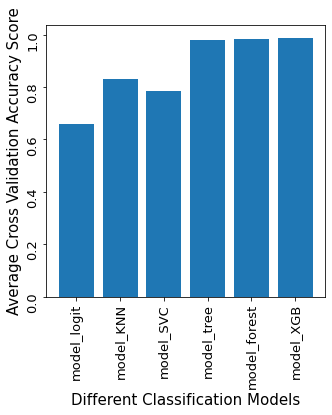

In [62]:
print(avg_cv_scores)
fig,ax=plt.subplots(figsize=(5,5))
ax.bar(models_names,avg_cv_scores)
ax.set_xlabel('Different Classification Models',fontsize=15)
ax.set_ylabel('Average Cross Validation Accuracy Score',fontsize=15)
ax.tick_params(axis='both',labelsize=13,rotation=90)

##### K-Fold Cross Validation, XG Boost model gives an average accuracy score of "0.988" with a standard deviation of "0.01"